In [1]:
from astropy.io import fits
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
%matplotlib inline

In [2]:
h=fits.open('C02_master_merged.fits')
mag=25-2.5*np.log10(h[1].data['Total_flux'])
RA,Dec=h[1].data['RA']*u.radian,h[1].data['DEC']*u.radian
RA,Dec=RA.to(u.deg),Dec.to(u.deg)

#Ensure all targets are unique
unq=np.unique(RA*Dec,return_index=True)[1]
RA,Dec,mag=RA[unq],Dec[unq],mag[unq]


In [3]:
targs=pd.read_csv('K2Campaign2targets.csv')
t_ids,t_RA,t_Dec,t_mag=np.zeros(len(targs),dtype=int),np.zeros(len(targs)),np.zeros(len(targs)),np.zeros(len(targs))
for i,ID,r,d,m in zip(xrange(len(targs)),targs[targs.keys()[0]],targs[targs.keys()[1]],targs[targs.keys()[2]],targs[targs.keys()[3]]):
    try: 
        t_ids[i]=ID
        t_RA[i]=float(r)
        t_Dec[i]=float(d)
        t_mag[i]=float(m)
    except:
        continue
ok=np.any([[t_RA!=0],[t_Dec!=0],[t_mag!=0]],axis=0)[0]
t_RA=t_RA[ok]
t_Dec=t_Dec[ok]
t_mag=t_mag[ok]
t_ids=t_ids[ok]
#Ensure all targets are unique
unq=np.unique(t_RA*t_Dec,return_index=True)[1]
t_RA,t_Dec,t_mag,t_ids=t_RA[unq],t_Dec[unq],t_mag[unq],t_ids[unq]
t_ids=np.asarray(t_ids,dtype=str)

In [4]:
from astropy.coordinates import SkyCoord
crossmatch_tolerance=4*u.arcsec #One pixel. This is still quite large

K2SCcatalog = SkyCoord(ra=RA, dec=Dec)
targcatalog = SkyCoord(ra=t_RA*u.deg,dec=t_Dec*u.deg)
idx, d2d, d3d = targcatalog.match_to_catalog_sky(K2SCcatalog) 
K2SCpos=idx[d2d<=crossmatch_tolerance]
idx2, d2d2, d3d2 = K2SCcatalog[K2SCpos].match_to_catalog_sky(targcatalog)  
targpos=idx2[d2d2<=crossmatch_tolerance]

In [5]:
zeropoint=np.median(mag[K2SCpos]-t_mag[targpos])

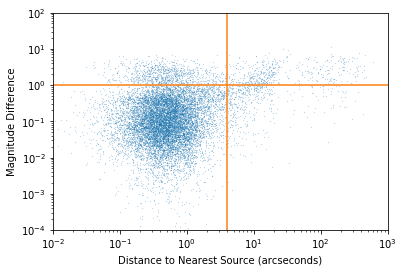

In [9]:
idx, d2d, d3d = targcatalog.match_to_catalog_sky(K2SCcatalog)  
plt.scatter(d2d.to(u.arcsec),np.abs(t_mag-(mag[idx]-zeropoint)),s=0.01)
plt.yscale('log')
plt.xscale('log')
plt.ylim(0.0001,100)
plt.xlim(0.01,1000)
plt.xlabel('Distance to Nearest Source (arcseconds)')
plt.ylabel('Magnitude Difference')
plt.axhline(1.,c='C1')
plt.axvline(4,c='C1')

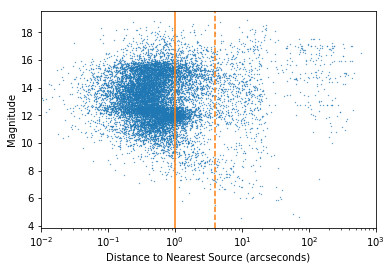

In [17]:
idx, d2d, d3d = targcatalog.match_to_catalog_sky(K2SCcatalog)  
plt.scatter(d2d.to(u.arcsec),np.abs((mag[idx]-zeropoint)),s=0.1)
plt.xscale('log')
plt.xlim(0.01,1000)
plt.ylabel('Magnitude')
plt.xlabel('Distance to Nearest Source (arcseconds)')
plt.axvline(1,c='C1')
plt.axvline(4,c='C1',ls='--')

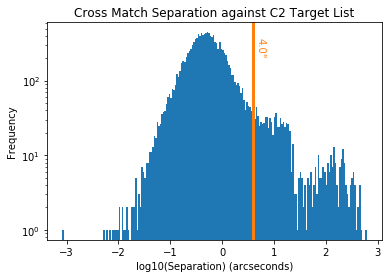

In [10]:
fig,ax=plt.subplots()
_=ax.hist(np.log10(d2d.to(u.arcsec).value),200)
plt.yscale('log')
plt.axvline(np.log10(crossmatch_tolerance.value),c='C1',lw=3)
plt.ylabel('Frequency')
plt.xlabel('log10(Separation) (arcseconds)')
plt.title('Cross Match Separation against C2 Target List')
plt.text(np.log10(crossmatch_tolerance.value+0.5),3E2,"{}".format(crossmatch_tolerance.value)+'"',rotation=270,color='C1')
plt.savefig('images/crossmatch_input.png',dpi=150,bbox_inches='tight')

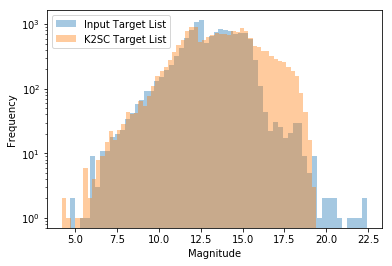

In [248]:
_=plt.hist(t_mag,60,alpha=0.4,label='Input Target List')
_=plt.hist(mag,60,alpha=0.4,label='K2SC Target List')
plt.yscale('log')
plt.ylabel('Frequency')
plt.xlabel('Magnitude')
plt.legend()
plt.savefig('images/histogram.png',dpi=150,bbox_inches='tight')

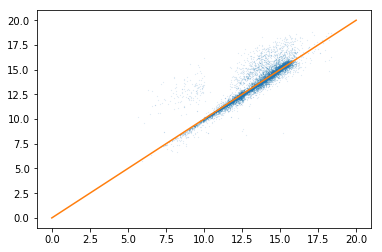

In [267]:
zeropoint=np.median(mag[K2SCpos]-t_mag[targpos])
plt.plot(t_mag[targpos],mag[K2SCpos]-zeropoint,marker='.',ms=0.1,ls='')
plt.plot([0,20],[0,20],c='C1')

10474


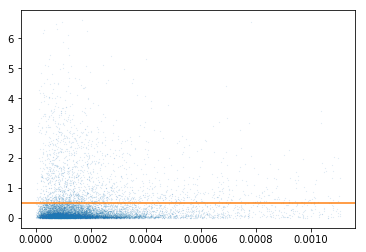

In [268]:
threshold=0.5
plt.plot(d2d[d2d<=crossmatch_tolerance],np.abs(mag[K2SCpos]-zeropoint-t_mag[targpos]),marker='.',ls='',ms=0.1)
plt.axhline(threshold,c='C1')
cut1=np.where(np.abs(mag[K2SCpos]-zeropoint-t_mag[targpos])<=threshold)[0]

print len(cut1)

In [293]:
targlist=pd.read_csv('/Users/christina/Downloads/epic_1_06jul17.txt',delimiter='|')
targlist=targlist[(np.asarray(targlist.k2_ra)>=238.) & (np.asarray(targlist.k2_ra)<=255.) & 
                  (np.asarray(targlist.k2_dec)>=-30.) & (np.asarray(targlist.k2_dec)<=-15)]
targlist=targlist.reset_index(drop=True)

In [294]:
EPICcatalog=SkyCoord(targlist.k2_ra*u.deg,targlist.k2_dec*u.deg)

KeyboardInterrupt: 

In [ ]:
idx, d2d, d3d = K2SC.match_to_catalog_sky(EPICcatalog)  
plt.scatter(d2d.to(u.arcsec),np.abs(t_mag-mag[idx]),s=0.01)
plt.yscale('log')
plt.xscale('log')
plt.ylim(0.0001,100)
plt.xlim(0.01,1000)
plt.xlabel('Distance to Nearest Source (arcseconds)')
plt.ylabel('Magnitude Difference')
plt.axhline(1.,c='C1')
plt.axvline(4,c='C1')

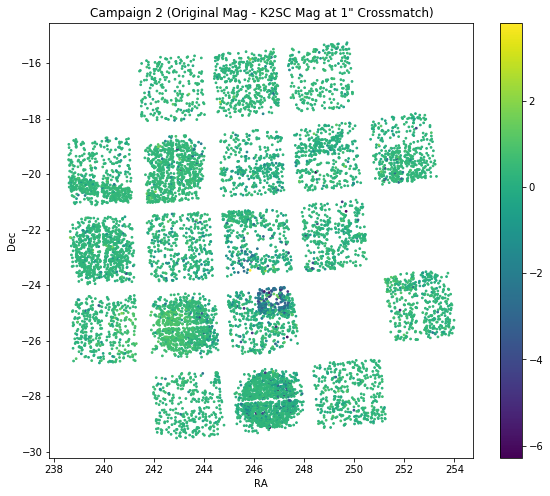

In [9]:
plt.figure(figsize=(9.5,8))
plt.scatter(RA[K2SCpos],Dec[K2SCpos],c=t_mag[targpos]-mag[K2SCpos],s=3)
plt.colorbar()
plt.xlabel('RA')
plt.ylabel('Dec')
cbar.set_label('Magnitude Difference')
plt.title('Campaign 2 (Original Mag - K2SC Mag at 1" Crossmatch)')
plt.savefig('images/diffradec.png',dpi=150,bbox_inches='tight')

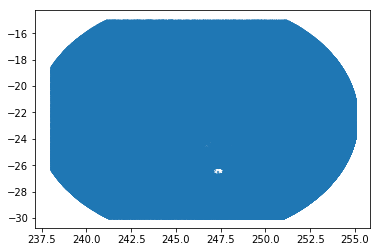

In [152]:
print np.unique(targlist.kepflag[idx3])

[nan nan nan nan nan nan nan nan 'BV' 'J' 'JHK' 'gri']


In [160]:
good=np.where((targlist.kepflag[idx3]=='gri') | (targlist.kepflag[idx3]=='BV'))[0]
print float(len(good))/len(idx3)

0.651678774789


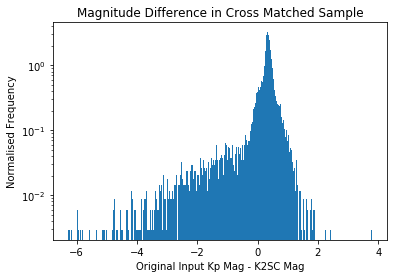

In [161]:
_=plt.hist(targlist.kp[idx3]-mag[K2SCpos],300,normed=True)
plt.yscale('log')
plt.ylabel('Normalised Frequency')
plt.xlabel('Original Input Kp Mag - K2SC Mag')
plt.title('Magnitude Difference in Cross Matched Sample')

plt.savefig('images/mag_match1.png',dpi=150,bbox_inches='tight')

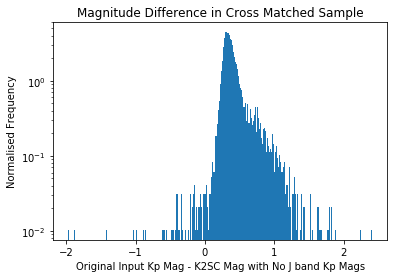

In [162]:
_=plt.hist(np.asarray(targlist.kp[idx3])[good]-mag[K2SCpos][good],300,normed=True)
plt.yscale('log')
plt.ylabel('Normalised Frequency')
plt.xlabel('Original Input Kp Mag - K2SC Mag with No J band Kp Mags')
plt.title('Magnitude Difference in Cross Matched Sample')
plt.savefig('images/mag_match2.png',dpi=150,bbox_inches='tight')

In [148]:
diff=np.asarray(targlist.kp[idx3])[good]-mag[K2SCpos][good]
print 100.*float(len(np.where(diff<=0.5)[0]))/len(diff),'%'

81.7414884001 %


In [163]:
idx4, d2d4, d3d = K2SCcatalog.match_to_catalog_sky(EPICcatalog) 

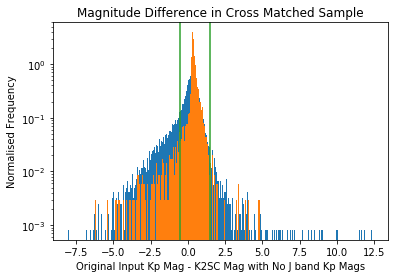

In [182]:
_=plt.hist(np.asarray(targlist.kp[idx4])-mag,300,normed=True)
plt.yscale('log')
plt.ylabel('Normalised Frequency')
plt.xlabel('Original Input Kp Mag - K2SC Mag with No J band Kp Mags')
plt.title('Magnitude Difference in Cross Matched Sample')
good=np.where((targlist.kepflag[idx4]=='gri') | (targlist.kepflag[idx4]=='BV'))[0]

_=plt.hist(np.asarray(targlist.kp[idx4])[good]-mag[good],300,normed=True)
plt.yscale('log')
plt.ylabel('Normalised Frequency')
plt.xlabel('Original Input Kp Mag - K2SC Mag with No J band Kp Mags')
plt.title('Magnitude Difference in Cross Matched Sample')
plt.axvline(-0.5,c='C2')
plt.axvline(1.5,c='C2')

In [180]:
print targlist.loc[idx4[good]]

                id      hip          tyc        ucac           twomass  \
270570   202640245      NaN          NaN  306-095345  16445977-2854529   
256153   202625828      NaN   6808-745-1  306-094775  16430471-2858096   
276314   202645989      NaN          NaN  306-095347  16445997-2853359   
273639   202643314      NaN          NaN  306-095210  16443009-2854123   
214391   202584066      NaN   6807-313-1  305-094648  16361403-2907424   
265905   202635580      NaN  6808-1374-1  306-094657  16424182-2855559   
254206   202623881      NaN          NaN  306-094096  16410706-2858359   
265786   202635461      NaN          NaN  306-094627  16423703-2855574   
267227   202636902      NaN          NaN  306-094635  16423795-2855384   
249950   202619625      NaN          NaN  306-093883  16401348-2859338   
213220   202582895      NaN          NaN  305-094345  16351169-2907588   
239008   202608683      NaN  6808-1163-1  305-095244  16382729-2902037   
233741   202603416      NaN  6808-1312

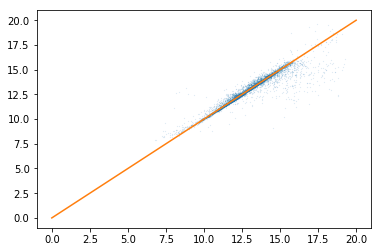

In [207]:
good=np.where((targlist.kepflag[idx4]=='gri'))[0]
zeropoint=np.mean(mag[good]-np.asarray(targlist.kp[idx4])[good])
plt.plot(mag[good]-zeropoint,np.asarray(targlist.kp[idx4])[good],marker='.',ms=0.1,ls='')
plt.plot([0,20],[0,20],c='C1')

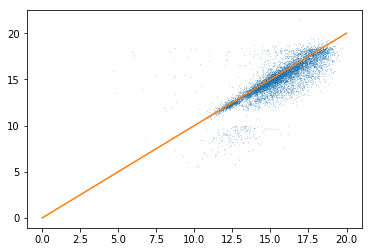

In [210]:
bad=np.where((targlist.kepflag[idx4]!='gri') & (targlist.kepflag[idx4]!='BV'))[0]
plt.scatter(mag[bad]-zeropoint,np.asarray(targlist.kp[idx4])[bad],s=0.01)
plt.plot([0,20],[0,20],c='C1')

IndexError: index 13402 is out of bounds for axis 1 with size 13401